In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ackley 2D')

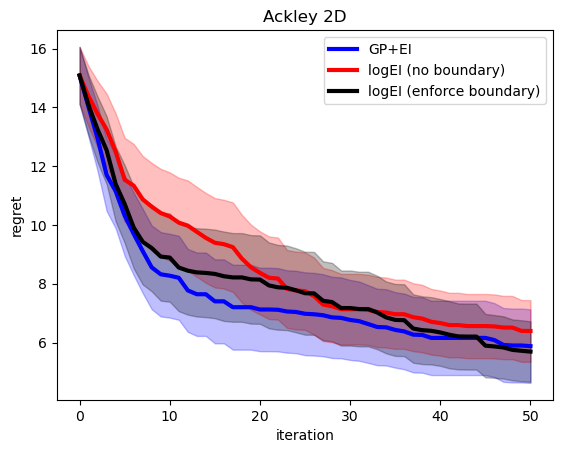

In [5]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley2D_SLogGP+logEI(enforceboundary)'), delimiter=',')

N = 25
fstar = 0.

total_record = (np.array(BO_EI)-fstar)
mean = np.mean(total_record,axis=0)
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='GP+EI',color='blue')
plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='blue')

total_record = (np.array(SLogGP_logEI)-fstar)
mean = np.mean(total_record,axis=0)
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (no boundary)',color='red')
plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='red')

total_record = (np.array(SLogGP_logEI_enforceboundary)-fstar)
mean = np.mean(total_record,axis=0)
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (enforce boundary)',color='black')
plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='black')

plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Ackley 2D')

Text(0.5, 1.0, 'Branin 2D')

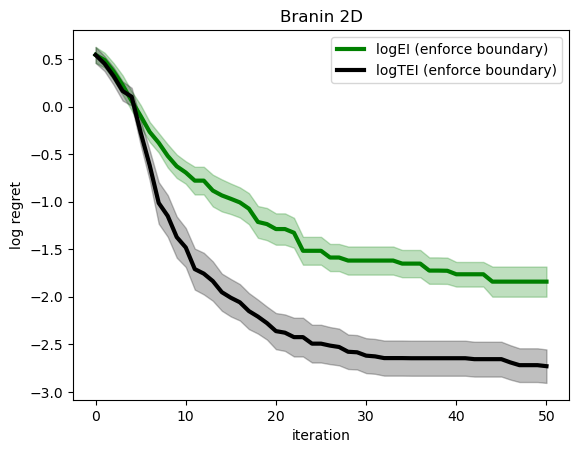

In [3]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Branin2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Branin2D_SLogGP+logTEI'), delimiter=',')
SLogGP_logEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Branin2D_SLogGP+logEI(enforceboundary)'), delimiter=',')
SLogGP_logTEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Branin2D_SLogGP+logTEI(enforceboundary)'), delimiter=',')

N = 25
fstar = 0.397887

# total_record = np.log10(np.array(BO_EI)-fstar)
# mean = (np.mean(total_record,axis=0))
# std = np.std(total_record,axis=0)
# iter = np.array(range(mean.shape[0]))
# plt.plot(mean,linewidth=3,label='GP+EI',color='blue')
# plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='blue')

# total_record = np.log10(np.array(SLogGP_logEI)-fstar)
# mean = (np.mean(total_record,axis=0))
# std = np.std(total_record,axis=0)
# iter = np.array(range(mean.shape[0]))
# plt.plot(mean,linewidth=3,label='logEI (no boundary)',color='red')
# plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='red')

# total_record = np.log10(np.array(SLogGP_logTEI)-fstar)
# mean = (np.mean(total_record,axis=0))
# std = np.std(total_record,axis=0)
# iter = np.array(range(mean.shape[0]))
# plt.plot(mean,linewidth=3,label='logTEI (no boundary)',color='yellow')
# plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='yellow')

# total_record = np.log10(np.array(SLogGP_logEI_enforceboundary)-fstar)
# mean = (np.mean(total_record,axis=0))
# std = np.std(total_record,axis=0)
# iter = np.array(range(mean.shape[0]))
# plt.plot(mean,linewidth=3,label='logEI (enforce boundary)',color='green')
# plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='green')

# total_record = np.log10(np.array(SLogGP_logTEI_enforceboundary)-fstar)
# mean = (np.mean(total_record,axis=0))
# std = np.std(total_record,axis=0)
# iter = np.array(range(mean.shape[0]))
# plt.plot(mean,linewidth=3,label='logTEI (enforce boundary)',color='black')
# plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='black')

plt.xlabel('iteration')
plt.ylabel('log regret')

plt.legend()
plt.title('Branin 2D')

Text(0.5, 1.0, 'Beale 2D')

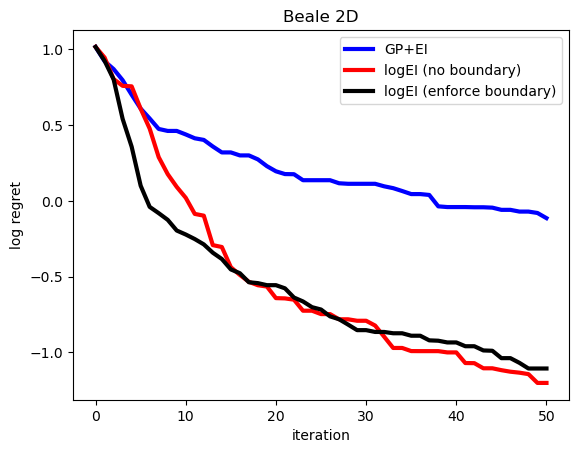

In [9]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Beale2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Beale2D_SLogGP+logEI(enforceboundary)'), delimiter=',')

N = 25
fstar = 0.

total_record = (np.array(BO_EI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='GP+EI',color='blue')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='blue')

total_record = (np.array(SLogGP_logEI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (no boundary)',color='red')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='red')

total_record = (np.array(SLogGP_logEI_enforceboundary)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (enforce boundary)',color='black')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='black')

plt.xlabel('iteration')
plt.ylabel('log regret')

plt.legend()
plt.title('Beale 2D')

Text(0.5, 1.0, 'Levy 2D')

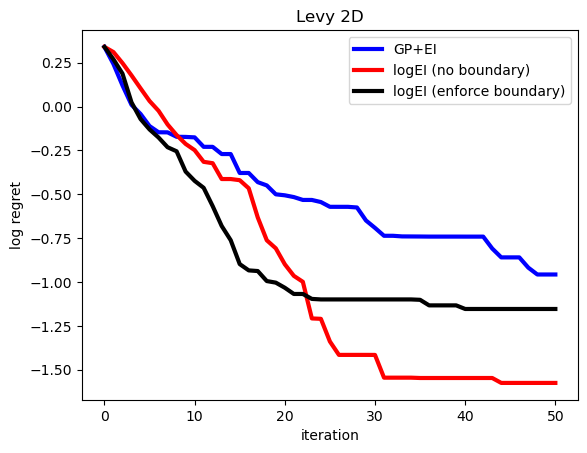

In [8]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Levy2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Levy2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Levy2D_SLogGP+logEI(enforceboundary)'), delimiter=',')

N = 25
fstar = 0.

total_record = (np.array(BO_EI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='GP+EI',color='blue')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='blue')

total_record = (np.array(SLogGP_logEI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (no boundary)',color='red')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='red')

total_record = (np.array(SLogGP_logEI_enforceboundary)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (enforce boundary)',color='black')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='black')

plt.xlabel('iteration')
plt.ylabel('log regret')

plt.legend()
plt.title('Levy 2D')

Text(0.5, 1.0, 'SixHumpCamel 2D')

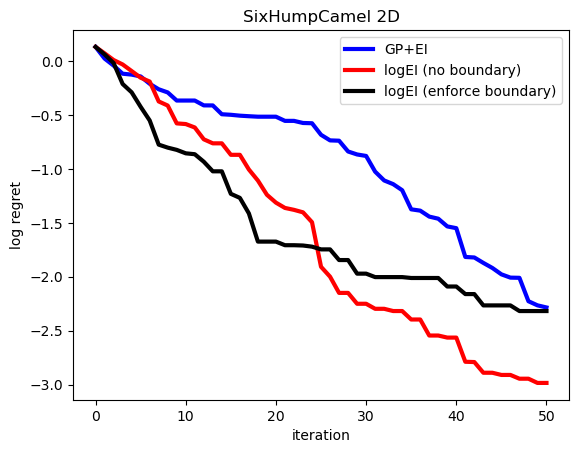

In [7]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/SixHumpCamel2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/SixHumpCamel2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/SixHumpCamel2D_SLogGP+logEI(enforceboundary)'), delimiter=',')

N = 25
fstar = -1.0317

total_record = (np.array(BO_EI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='GP+EI',color='blue')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='blue')

total_record = (np.array(SLogGP_logEI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (no boundary)',color='red')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='red')

total_record = (np.array(SLogGP_logEI_enforceboundary)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (enforce boundary)',color='black')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='black')
plt.xlabel('iteration')
plt.ylabel('log regret')

plt.legend()
plt.title('SixHumpCamel 2D')

Text(0.5, 1.0, 'Rosenbrock 2D')

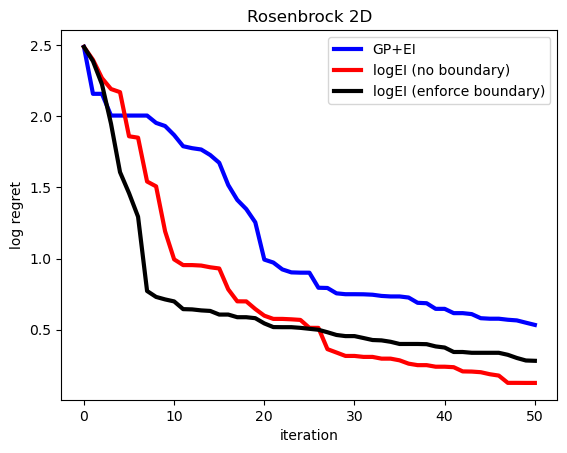

In [6]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_enforceboundary = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock2D_SLogGP+logEI(enforceboundary)'), delimiter=',')

N = 25
fstar = 0.

total_record = (np.array(BO_EI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='GP+EI',color='blue')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='blue')

total_record = (np.array(SLogGP_logEI)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (no boundary)',color='red')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='red')

total_record = (np.array(SLogGP_logEI_enforceboundary)-fstar)
mean = np.log10(np.mean(total_record,axis=0))
std = np.std(total_record,axis=0)
iter = np.array(range(mean.shape[0]))
plt.plot(mean,linewidth=3,label='logEI (enforce boundary)',color='black')
#plt.fill_between(iter, mean-std/np.sqrt(N), mean+std/np.sqrt(N),alpha=0.25,color='black')

plt.xlabel('iteration')
plt.ylabel('log regret')

plt.legend()
plt.title('Rosenbrock 2D')